In [1]:
from transformers import T5Tokenizer, AutoModelForSeq2SeqLM
import torch
import re
import tqdm as notebook_tqdm
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained('Rostlab/ProstT5', do_lower_case=False)

# Load the model
model = AutoModelForSeq2SeqLM.from_pretrained("Rostlab/ProstT5").to(device)

# only GPUs support half-precision currently; if you want to run on CPU use full-precision (not recommended, much slower)
model.float() if device.type=='cpu' else model.half()

/Users/christopher/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


T5ForConditionalGeneration(
  (shared): Embedding(150, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(150, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dro

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
df = pd.read_csv('Seq_Node245.csv')
aas = [col[-1] for col in np.array(df.columns[3:]).astype(str)]

In [8]:
df

,Node,Site,State,p_A,p_R,p_N,p_D,p_C,p_Q,p_E,...,p_L,p_K,p_M,p_F,p_P,p_S,p_T,p_W,p_Y,p_V
0,Node245,1,D,0.05982,0.05519,0.09829,0.16444,0.00922,0.05710,0.11608,...,0.03371,0.07273,0.01199,0.01444,0.02727,0.07336,0.05173,0.00365,0.01438,0.02987
1,Node245,2,L,0.07433,0.04873,0.04741,0.04289,0.01740,0.03176,0.04706,...,0.11093,0.05611,0.02910,0.03699,0.04615,0.05447,0.05661,0.00607,0.02471,0.10689
2,Node245,3,E,0.05583,0.08717,0.06477,0.08137,0.00686,0.08920,0.14338,...,0.03894,0.10052,0.01430,0.01633,0.02250,0.06009,0.04561,0.00387,0.02059,0.03242
3,Node245,4,E,0.05332,0.05682,0.05324,0.13439,0.00640,0.06163,0.18842,...,0.04157,0.07678,0.01326,0.02444,0.02613,0.05749,0.04067,0.01945,0.02684,0.03027
4,Node245,5,E,0.04449,0.03142,0.01922,0.04330,0.00134,0.20309,0.43511,...,0.01612,0.06296,0.00908,0.00299,0.00893,0.04327,0.03039,0.00078,0.00466,0.01476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Node245,657,A,0.40383,0.02364,0.01883,0.01776,0.01221,0.02259,0.03561,...,0.04588,0.03598,0.01779,0.01710,0.01537,0.09410,0.06148,0.00198,0.01204,0.06749
657,Node245,658,L,0.03065,0.12300,0.01464,0.00946,0.00517,0.02596,0.02307,...,0.14357,0.07198,0.03054,0.09511,0.00656,0.02337,0.02578,0.09248,0.13426,0.05250
658,Node245,659,L,0.06895,0.02712,0.02261,0.02312,0.01818,0.01877,0.02546,...,0.16094,0.03213,0.03679,0.05684,0.01735,0.03875,0.04711,0.00813,0.03047,0.14257
659,Node245,660,V,0.07900,0.03734,0.02107,0.02382,0.01538,0.02220,0.03112,...,0.12263,0.04345,0.03056,0.02984,0.08164,0.04244,0.05279,0.00387,0.01791,0.16048


In [25]:
aas = []
for i in range(len(df.columns[3:])):
    aas.append(df.columns[3:][i][-1])

In [26]:
aas

['A',
 'R',
 'N',
 'D',
 'C',
 'Q',
 'E',
 'G',
 'H',
 'I',
 'L',
 'K',
 'M',
 'F',
 'P',
 'S',
 'T',
 'W',
 'Y',
 'V']

In [24]:
df.columns[3:][0][-1]

'A'

In [35]:
row_indices = np.arange(len(seq))
col_names = ['p_' + char for char in seq]
    # Use pandas' advanced indexing
values = df.loc[row_indices, col_names].values

In [42]:
len(np.diag(values))

661

In [43]:
def sum_string_values_vectorized(string, df):
    # Create arrays for row indices and column names
    row_indices = np.arange(len(string))
    col_names = ['p_' + char for char in string]
    # Use pandas' advanced indexing
    values = df.loc[row_indices, col_names].values
    return np.sum(np.log(np.diag(values)))


In [32]:
sum_string_values_vectorized(seq_list[10], df)

-1474.5645560951111

In [48]:
import random
logprobs = []
seq = str(seq_list[0])
for _ in tqdm(range(100000)):
    i = random.randint(0, len(seq)-1)
    seq_prop = str(seq)
    seq_prop = seq_prop[:i] + random.choice(aas) + seq_prop[i+1:]

    if np.log(np.random.rand()) < sum_string_values_vectorized(seq_prop,df) - sum_string_values_vectorized(seq,df):
        seq = seq_prop

    logprobs.append(sum_string_values_vectorized(seq,df))

  0%|                                      | 28/100000 [00:00<05:57, 279.72it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  0%|                                     | 160/100000 [00:00<04:00, 414.56it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  0%|                                     | 204/100000 [00:00<03:55, 423.57it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/4649095

  3%|▉                                   | 2647/100000 [00:06<03:43, 435.31it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  3%|█                                   | 2825/100000 [00:06<03:42, 435.83it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  3%|█                                   | 2870/100000 [00:06<03:41, 437.89it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  3%|█                                   | 2914/100000 [00:06<03:43, 434

  5%|█▊                                  | 4985/100000 [00:11<03:38, 434.56it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  5%|█▊                                  | 5029/100000 [00:11<03:38, 435.36it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  5%|█▊                                  | 5073/100000 [00:11<03:37, 435.84it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  5%|█▊                                  | 5117/100000 [00:11<03:37, 436

  8%|██▊                                 | 7684/100000 [00:18<04:03, 379.65it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  8%|██▊                                 | 7770/100000 [00:18<03:51, 398.64it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  8%|██▊                                 | 7811/100000 [00:18<03:54, 392.62it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
  8%|██▊                                 | 7892/100000 [00:18<03:58, 385.94it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 10%|███▌                               | 10287/100000 [00:24<03:27, 432.30it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 10%|███▋                               | 10419/100000 [00:24<03:27, 430.78it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 11%|███▋                               | 10507/100000 [00:25<03:27, 431.37it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 11%|███▋                               | 10552/100000 [00:25<03:26, 433.13it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 13%|████▋                              | 13306/100000 [00:31<03:19, 434.22it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 13%|████▋                              | 13350/100000 [00:31<03:20, 432.00it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 14%|████▊                              | 13616/100000 [00:32<03:18, 435.97it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 14%|████▊                              | 13660/100000 [00:32<03:19, 433

 16%|█████▌                             | 15784/100000 [00:37<03:10, 441.08it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 16%|█████▌                             | 15829/100000 [00:37<03:13, 434.89it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 16%|█████▌                             | 15873/100000 [00:37<03:14, 432.32it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 16%|█████▌                             | 15917/100000 [00:37<03:14, 433.20it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 19%|██████▌                            | 18880/100000 [00:44<03:07, 433.27it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 19%|██████▋                            | 19012/100000 [00:44<03:07, 432.51it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 19%|██████▋                            | 19101/100000 [00:44<03:06, 434.16it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/4649095

 22%|███████▌                           | 21606/100000 [00:51<03:37, 360.46it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 22%|███████▌                           | 21679/100000 [00:51<03:39, 357.38it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 22%|███████▌                           | 21753/100000 [00:51<03:36, 361.19it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 22%|███████▋                           | 21829/100000 [00:52<03:31, 368.80it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 25%|████████▊                          | 25341/100000 [01:00<02:58, 417.10it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 25%|████████▉                          | 25424/100000 [01:01<03:06, 399.22it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 26%|████████▉                          | 25505/100000 [01:01<03:08, 394.74it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 26%|████████▉                          | 25548/100000 [01:01<03:04, 404

 29%|██████████                         | 28618/100000 [01:08<02:50, 418.32it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 29%|██████████                         | 28869/100000 [01:09<02:52, 412.90it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 29%|██████████▏                        | 29049/100000 [01:09<02:42, 436.17it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 29%|██████████▏                        | 29183/100000 [01:10<02:41, 437

 32%|███████████▏                       | 32106/100000 [01:16<02:41, 419.79it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 32%|███████████▎                       | 32150/100000 [01:16<02:40, 422.59it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 32%|███████████▎                       | 32194/100000 [01:17<02:38, 427.32it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 32%|███████████▎                       | 32285/100000 [01:17<02:34, 437

 36%|████████████▍                      | 35509/100000 [01:24<02:25, 444.44it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 36%|████████████▍                      | 35599/100000 [01:24<02:24, 445.68it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 36%|████████████▍                      | 35644/100000 [01:24<02:25, 443.41it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 36%|████████████▌                      | 35734/100000 [01:25<02:24, 443.30it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 39%|█████████████▌                     | 38777/100000 [01:32<02:17, 446.58it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 39%|█████████████▌                     | 38912/100000 [01:32<02:16, 447.02it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 39%|█████████████▋                     | 39048/100000 [01:32<02:15, 448.56it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 39%|█████████████▋                     | 39093/100000 [01:32<02:16, 447.20it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 42%|██████████████▌                    | 41536/100000 [01:38<02:11, 445.65it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 42%|██████████████▌                    | 41627/100000 [01:38<02:10, 447.31it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 42%|██████████████▌                    | 41672/100000 [01:38<02:11, 444.84it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 42%|██████████████▌                    | 41762/100000 [01:38<02:11, 441.34it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 45%|███████████████▋                   | 44648/100000 [01:45<02:06, 437.14it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 45%|███████████████▋                   | 44736/100000 [01:45<02:06, 436.77it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 45%|███████████████▋                   | 44915/100000 [01:45<02:05, 438.83it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 45%|███████████████▋                   | 44960/100000 [01:46<02:05, 438

 47%|████████████████▍                  | 47004/100000 [01:50<02:00, 439.75it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 47%|████████████████▍                  | 47049/100000 [01:50<02:00, 439.47it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 47%|████████████████▌                  | 47230/100000 [01:51<01:58, 445.49it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 47%|████████████████▌                  | 47275/100000 [01:51<02:06, 416.09it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 50%|█████████████████▌                 | 50185/100000 [01:58<02:00, 414.00it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 50%|█████████████████▌                 | 50271/100000 [01:58<01:58, 418.17it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 50%|█████████████████▌                 | 50314/100000 [01:58<01:58, 420.55it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 51%|█████████████████▋                 | 50534/100000 [01:59<01:53, 433.92it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 53%|██████████████████▌                | 52873/100000 [02:04<01:48, 433.85it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 53%|██████████████████▌                | 52962/100000 [02:04<01:47, 435.96it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.lo

 55%|███████████████████▏               | 54914/100000 [02:09<01:45, 425.47it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 55%|███████████████████▎               | 55004/100000 [02:09<01:43, 433.56it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 55%|███████████████████▎               | 55048/100000 [02:09<01:43, 433.44it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 55%|███████████████████▎               | 55137/100000 [02:09<01:42, 437.62it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 57%|████████████████████               | 57325/100000 [02:14<01:36, 441.08it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 57%|████████████████████               | 57415/100000 [02:15<01:36, 441.66it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 58%|████████████████████▏              | 57595/100000 [02:15<01:36, 438.01it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 58%|████████████████████▏              | 57639/100000 [02:15<01:37, 435

 61%|█████████████████████▎             | 60758/100000 [02:22<01:33, 417.87it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 61%|█████████████████████▎             | 60801/100000 [02:23<01:33, 419.50it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 61%|█████████████████████▎             | 60888/100000 [02:23<01:31, 425.22it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/4649095

 62%|█████████████████████▊             | 62474/100000 [02:27<01:27, 426.72it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 63%|█████████████████████▉             | 62517/100000 [02:27<01:28, 423.66it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 63%|█████████████████████▉             | 62647/100000 [02:27<01:28, 420.83it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 63%|█████████████████████▉             | 62778/100000 [02:27<01:27, 427.33it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 66%|██████████████████████▉            | 65624/100000 [02:34<01:19, 432.43it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 66%|██████████████████████▉            | 65668/100000 [02:34<01:19, 431.97it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 66%|███████████████████████            | 66006/100000 [02:35<01:22, 412.66it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 66%|███████████████████████▏           | 66179/100000 [02:35<01:23, 406.37it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 68%|███████████████████████▉           | 68245/100000 [02:40<01:13, 431.40it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 68%|███████████████████████▉           | 68333/100000 [02:40<01:14, 427.36it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 68%|███████████████████████▉           | 68376/100000 [02:41<01:14, 426.47it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 68%|███████████████████████▉           | 68464/100000 [02:41<01:13, 430.70it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 71%|████████████████████████▉          | 71339/100000 [02:47<01:06, 431.72it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 72%|█████████████████████████          | 71650/100000 [02:48<01:04, 437.93it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 72%|█████████████████████████          | 71779/100000 [02:48<01:09, 407.87it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 72%|█████████████████████████▏         | 71904/100000 [02:49<01:08, 408.18it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 74%|██████████████████████████         | 74294/100000 [02:54<01:00, 425.52it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 74%|██████████████████████████         | 74339/100000 [02:54<00:59, 429.04it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 74%|██████████████████████████         | 74382/100000 [02:55<01:00, 420.96it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 74%|██████████████████████████         | 74425/100000 [02:55<01:01, 416.54it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 77%|██████████████████████████▊        | 76677/100000 [03:00<00:52, 444.46it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 77%|██████████████████████████▊        | 76767/100000 [03:00<00:52, 445.79it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 77%|██████████████████████████▉        | 76812/100000 [03:00<00:51, 446.82it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 77%|██████████████████████████▉        | 76993/100000 [03:00<00:51, 442

 79%|███████████████████████████▊       | 79387/100000 [03:06<00:46, 447.88it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 80%|███████████████████████████▊       | 79568/100000 [03:06<00:45, 448.33it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 80%|███████████████████████████▉       | 79659/100000 [03:06<00:45, 449.04it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 80%|███████████████████████████▉       | 79840/100000 [03:07<00:45, 445

 83%|████████████████████████████▉      | 82690/100000 [03:13<00:38, 444.28it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 83%|████████████████████████████▉      | 82780/100000 [03:13<00:38, 444.22it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 83%|████████████████████████████▉      | 82825/100000 [03:14<00:38, 442.85it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 83%|█████████████████████████████      | 83003/100000 [03:14<00:39, 433.54it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 85%|█████████████████████████████▉     | 85480/100000 [03:20<00:32, 448.71it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 86%|█████████████████████████████▉     | 85616/100000 [03:20<00:32, 448.61it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 86%|█████████████████████████████▉     | 85707/100000 [03:20<00:31, 449.34it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/4649095

 88%|██████████████████████████████▊    | 87919/100000 [03:25<00:27, 445.72it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 88%|██████████████████████████████▊    | 87964/100000 [03:25<00:27, 445.51it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 88%|██████████████████████████████▊    | 88191/100000 [03:26<00:26, 448.64it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 88%|██████████████████████████████▉    | 88236/100000 [03:26<00:26, 448.91it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 91%|███████████████████████████████▋   | 90544/100000 [03:31<00:21, 446.94it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 91%|███████████████████████████████▋   | 90680/100000 [03:31<00:20, 445.87it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 91%|███████████████████████████████▊   | 90725/100000 [03:31<00:20, 444.88it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 91%|███████████████████████████████▊   | 90860/100000 [03:32<00:20, 444.56it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(va

 94%|████████████████████████████████▊  | 93884/100000 [03:39<00:13, 443.34it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 94%|████████████████████████████████▉  | 93929/100000 [03:39<00:13, 443.83it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 94%|████████████████████████████████▉  | 93974/100000 [03:39<00:13, 444.17it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 94%|████████████████████████████████▉  | 94019/100000 [03:39<00:13, 439

 97%|█████████████████████████████████▉ | 96986/100000 [03:46<00:06, 435.03it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 97%|█████████████████████████████████▉ | 97118/100000 [03:46<00:06, 430.92it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 97%|██████████████████████████████████ | 97248/100000 [03:47<00:06, 417.94it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_59809/464909516.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.diag(values)))
 97%|██████████████████████████████████ | 97421/100000 [03:47<00:06, 427

100%|██████████████████████████████████| 100000/100000 [03:54<00:00, 427.31it/s]


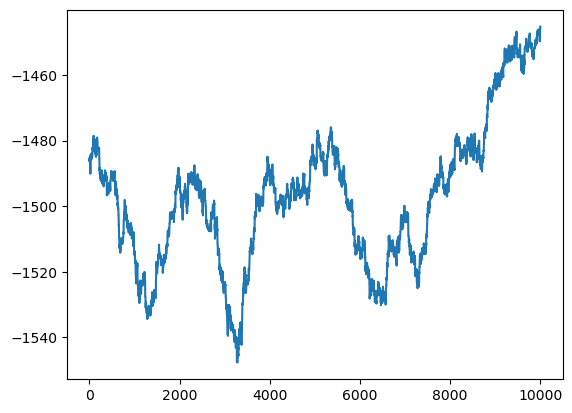

In [46]:
import matplotlib.pyplot as plt
plt.plot(logprobs)

In [2]:
def gen_seq(df,aas):
    seq = ''
    for i in range(df.shape[0]):
        p = np.array(df.loc[i][3:]).astype(float)
        p = p/np.sum(p)
        seq = seq + np.random.choice(aas, p=p)
    return seq

In [13]:
len(seq_list[0])

661

In [4]:
seq_list = []
for i in tqdm(range(20)):
    seq_list.append(gen_seq(df,aas))


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 27.53it/s]


In [73]:
seq_list

['RMHNELDLIRMGRTDCSLKMVVDTIPDQSSSPIVVYTGFDPTGELHLGHLQGALVNYIFSVKYLVEGYNVKFVFLIADFHAMISPPDHVRYSYCPVSIMIASLDRDAPVIGLLEPEKLRQITSQFVDDMQYIGGKLETLSIYFQSDLYVQTQYEEFVIALAKDSHVFLHASHPSCCVQLELVRDTDYGLAVPSEFRGLGVYDPYGAQLSAGLDEPYTSLDQGGKWIKAAIVECWKRPTICEQHNSGAGASTIEVDWQLKLKHTTPFVRVEEPNARGRTLSSSCFWRLGVWFEEGVDSVYPQNSGESVPVGELTYPILQAQDFAVFHMIAYKADIEIVGSDQRPHLRMARDIPFEELVVGYPEPPRIEHQPLVTLEDGAKMSKSAGNRIYLKNTPTSAKDDMEEVWMSFLMETKGKRLETDIKEHRADSDEPIYAREPQERTIRALDYFKDKANTATEGVKFWYKEDEYGDEDKPLKKGLRELIRVKKLIEKKVAKHKLKERNKDEEVAKESEEEYNNSPDYIGFRAREGPEESDVILNTEAKEMAAEEQTLKEAVDNERFVFIPGPEIWAWVFTGIAANDAGAVNSRAVHHQIKIIQKRPDPRAAPTNSLTDGALNVSPYRTEYLSVLTERKSQCKGDHMLIVGFSCKYAKGDKETATVIQ',
 'NMQFQLPTVADSIQAAQAERLFGRHPRRAREPITVKSGFSPTAKLHLGHAVAAMKAMYEQEAMYSDSCGVKFIFYIADMHALVGPGDSWIGIGIQSHIELRQRNSSQTSIASLNPEHIKKYVDQYLDDLLALGDNNEEESIFYQSEFAVDEVYHGIIVVLALKPAVYKGSCMPFSCLSDDKQHRQAQQTSGSSDHINTTAIDNFGDPSKVEGMNKGPHCRRQKDTRNMDMDDRAHTAECGGGQGPRSAACVLKVGWVMVAKDFIETNNYKKKDPQDHTITNADNTVGPAPWLPPIPDVGAIHTGNQTPVYKFIYPLLQAYDYPFIHELYYEA

In [ ]:


# prepare your protein sequences/structures as a list.
# Amino acid sequences are expected to be upper-case ("PRTEINO" below)
# while 3Di-sequences need to be lower-case.
sequence_examples = seq_list
min_len = min([ len(s) for s in sequence_examples])
max_len = max([ len(s) for s in sequence_examples])

# replace all rare/ambiguous amino acids by X (3Di sequences does not have those) and introduce white-space between all sequences (AAs and 3Di)
sequence_examples = [" ".join(list(re.sub(r"[UZOB]", "X", sequence))) for sequence in sequence_examples]

# add pre-fixes accordingly. For the translation from AAs to 3Di, you need to prepend "<AA2fold>"
sequence_examples = [ "<AA2fold>" + " " + s for s in sequence_examples]

# tokenize sequences and pad up to the longest sequence in the batch
ids = tokenizer.batch_encode_plus(sequence_examples,
                                  add_special_tokens=True,
                                  padding="longest",
                                  return_tensors='pt').to(device)

# Generation configuration for "folding" (AA-->3Di)
gen_kwargs_aa2fold = {
                  "do_sample": True,
                  "num_beams": 3, 
                  "top_p" : 0.95, 
                  "temperature" : 1.2, 
                  "top_k" : 6,
                  "repetition_penalty" : 1.2,
}

# translate from AA to 3Di (AA-->3Di)
with torch.no_grad():
  translations = model.generate( 
              ids.input_ids, 
              attention_mask=ids.attention_mask, 
              max_length=max_len, # max length of generated text
              min_length=min_len, # minimum length of the generated text
              early_stopping=True, # stop early if end-of-text token is generated
              num_return_sequences=1, # return only a single sequence
              **gen_kwargs_aa2fold
  )
# Decode and remove white-spaces between tokens
decoded_translations = tokenizer.batch_decode( translations, skip_special_tokens=True )
structure_sequences = [ "".join(ts.split(" ")) for ts in decoded_translations ] # predicted 3Di strings

# Now we can use the same model and invert the translation logic
# to generate an amino acid sequence from the predicted 3Di-sequence (3Di-->AA)

# add pre-fixes accordingly. For the translation from 3Di to AA (3Di-->AA), you need to prepend "<fold2AA>"
sequence_examples_backtranslation = [ "<fold2AA>" + " " + s for s in decoded_translations]

# tokenize sequences and pad up to the longest sequence in the batch
ids_backtranslation = tokenizer.batch_encode_plus(sequence_examples_backtranslation,
                                  add_special_tokens=True,
                                  padding="longest",
                                  return_tensors='pt').to(device)

# Example generation configuration for "inverse folding" (3Di-->AA)
gen_kwargs_fold2AA = {
            "do_sample": True,
            "top_p" : 0.85,
            "temperature" : 1.0,
            "top_k" : 3,
            "repetition_penalty" : 1.2,
}

# translate from 3Di to AA (3Di-->AA)
with torch.no_grad():
      backtranslations = model.generate( 
              ids_backtranslation.input_ids, 
              attention_mask=ids_backtranslation.attention_mask, 
              max_length=max_len, # max length of generated text
              min_length=min_len, # minimum length of the generated text
              #early_stopping=True, # stop early if end-of-text token is generated; only needed for beam-search
              num_return_sequences=1, # return only a single sequence
              **gen_kwargs_fold2AA
)
# Decode and remove white-spaces between tokens
decoded_backtranslations = tokenizer.batch_decode( backtranslations, skip_special_tokens=True )
aminoAcid_sequences = [ "".join(ts.split(" ")) for ts in decoded_backtranslations ] # predicted amino acid strings

In [18]:
structure_sequences

['ddddddd', 'dpppppp']

In [15]:
# Defaults from your example for 3Di --> AA
_default_gen_kwargs_fold2AA = {
    "do_sample": True,
    "top_p": 0.85,
    "temperature": 1.0,
    "top_k": 3,
    "repetition_penalty": 1.2,
    "num_return_sequences": 1,
}

def translate_3di_to_aa(three_di_sequences, gen_kwargs=None, seed=None):
    """
    Translate a list of 3Di sequences (lower-case; spaces OK) to amino-acid sequences.
    - Keeps output length equal to the input 3Di length.
    - Does NOT reload the model/tokenizer if already loaded.
    """
    if gen_kwargs is None:
        gen_kwargs = dict(_default_gen_kwargs_fold2AA)
    if seed is not None:
        torch.manual_seed(seed)

    outs = []
    for seq in three_di_sequences:
        # normalize: remove spaces, enforce lower-case 3Di, then space-separate tokens
        seq_clean = re.sub(r"\s+", "", str(seq)).lower()
        L = len(seq_clean)
        spaced = " ".join(list(seq_clean))
        prefixed = "<fold2AA> " + spaced

        enc = tokenizer.batch_encode_plus(
            [prefixed],
            add_special_tokens=True,
            padding=False,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            try:
                # Newer HF: exact-length via new-token controls
                gen = model.generate(
                    enc.input_ids,
                    attention_mask=enc.attention_mask,
                    min_new_tokens=L,
                    max_new_tokens=L,
                    **gen_kwargs
                )
            except ValueError:
                # Older HF: fall back to (min|max)_length
                gen = model.generate(
                    enc.input_ids,
                    attention_mask=enc.attention_mask,
                    min_length=L,
                    max_length=L,
                    early_stopping=True,
                    **gen_kwargs
                )

        decoded = tokenizer.batch_decode(gen, skip_special_tokens=True)[0]
        aa = "".join(decoded.split(" "))

        # final guard: trim/pad (pad unlikely) to exact length L
        if len(aa) > L:
            aa = aa[:L]
        elif len(aa) < L:
            # optional: right-pad with 'X' to preserve length if undershoot happens
            aa = aa + ("X" * (L - len(aa)))

        outs.append(aa)
    return outs


In [16]:
translate_3di_to_aa(sequence_examples)

['ADGGTGSGWGGCGGGX', 'MAGSVIGGNNTVVGPDX']

In [17]:
aminoAcid_sequences

['MKILVAG', 'MAENKSD']

In [11]:
sequence_examples

['<AA2fold> P R T E I N X', '<AA2fold> S E Q W E N C E']